In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def plot_loss(csv_filepath):
    data = pd.read_csv(csv_filepath, sep=';')
    
    fig, (p1, p2) = plt.subplots(1, 2, figsize=(15,5))

    sns.lineplot(data=data, x='epoch', y='train_entropy', ax=p1)
    sns.lineplot(data=data, x='epoch', y='val_entropy', ax=p1)
    p1.legend(labels=['train loss', 'val loss'])
    p1.set_title("Loss")

    sns.lineplot(data=data, x='epoch', y='val_acc', ax=p2)
    sns.lineplot(data=data, x='epoch', y='val_auroc', ax=p2)
    p2.legend(labels=['acc', 'aucroc'])
    p2.set_title("Metrics")
    
    p = data.iloc[data['val_entropy'].idxmin()][["epoch", "train_entropy", "val_entropy", "val_acc", "val_auroc"]]
    print(p)
    print("Select model at epoch %d" % (p["epoch"] + 1))

    plt.show()

# Full model

### Default LSTM

epoch            56.000000
train_entropy     0.249368
val_entropy       0.279520
val_acc           0.886716
val_auroc         0.863429
Name: 56, dtype: float64
Select model at epoch 57


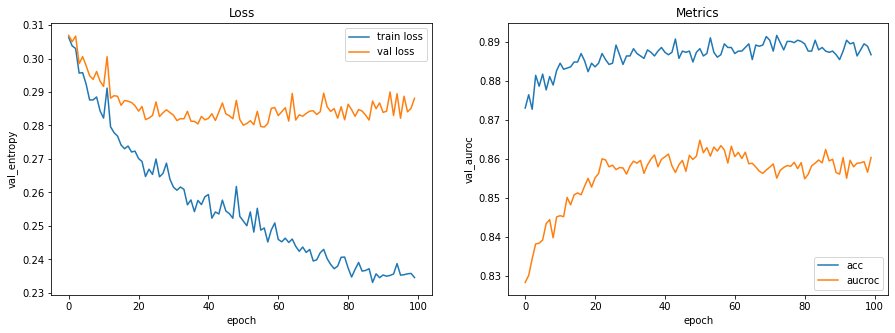

In [28]:
plot_loss("training_logs/k_lstm.n16.d0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2757  105] \
 [ 238  136]] \
entropy = 0.26587815453112473 \
accuracy = 0.8940049409866333 \
precision class 0 = 0.9205342531204224 \
precision class 1 = 0.5643153786659241 \
recall class 0 = 0.9633123874664307 \
recall class 1 = 0.3636363744735718 \
AUC of ROC = 0.8539716439272488 \
AUC of PRC = 0.4781193222878521 \
min(+P, Se) = 0.4786096256684492

### 0.3 dropout

epoch            68.000000
train_entropy     0.289284
val_entropy       0.292824
val_acc           0.883302
val_auroc         0.846445
Name: 68, dtype: float64
Select model at epoch 69


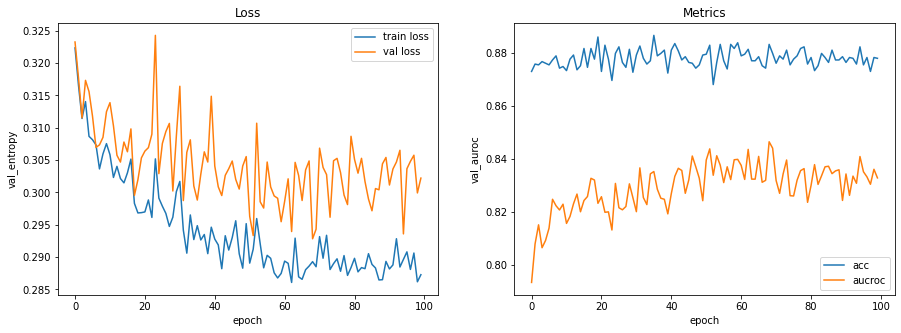

In [29]:
plot_loss("training_logs/k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2843   19] \
 [ 305   69]] \
entropy = 0.26438881113908824 \
accuracy = 0.8998764157295227 \
precision class 0 = 0.903113067150116 \
precision class 1 = 0.7840909361839294 \
recall class 0 = 0.9933612942695618 \
recall class 1 = 0.18449197709560394 \
AUC of ROC = 0.8525758883694512 \
AUC of PRC = 0.5099098118943177 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 0.00303400750271976 \
Aleatoric uncertainty = 0.0835852101445198 \
Uncertainty = 0.08661922067403793

### 0.5 dropout

epoch            73.000000
train_entropy     0.312713
val_entropy       0.311563
val_acc           0.877716
val_auroc         0.815090
Name: 73, dtype: float64
Select model at epoch 74


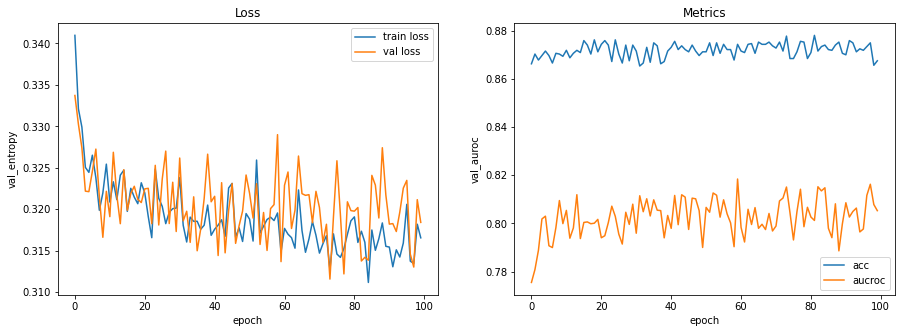

In [30]:
plot_loss("training_logs/k_lstm_stochastic.n16.d0.5.rd0.5.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2830   32] \
 [ 304   70]] \
entropy = 0.274401043504891 \
accuracy = 0.8961681127548218 \
precision class 0 = 0.9029993414878845 \
precision class 1 = 0.686274528503418 \
recall class 0 = 0.9888190031051636 \
recall class 1 = 0.1871657818555832 \
AUC of ROC = 0.8386127273474665 \
AUC of PRC = 0.4632016589973929 \
min(+P, Se) = 0.4656084656084656 \
Epistemic uncertainty = 0.005050228908658028 \
Aleatoric uncertainty = 0.08416983485221863 \
Uncertainty = 0.0892200618982315

### Concrete dropout

epoch            10.000000
train_entropy     0.255627
val_entropy       0.288171
val_acc           0.887647
val_auroc         0.852165
Name: 10, dtype: float64
Select model at epoch 11


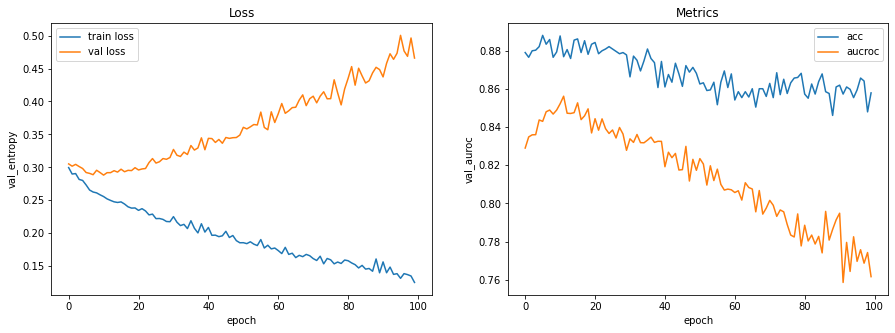

In [31]:
plot_loss("training_logs/k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

forward_stochastic_lstm_1 dropout = 0.32619372 \
forward_stochastic_lstm_1 recurrent_dropout = 0.35272005 \
backward_stochastic_lstm_1 dropout = 0.3854713 \
backward_stochastic_lstm_1 recurrent_dropout = 0.4355017 \
stochastic_lstm_2 dropout = 0.30197388 \
stochastic_lstm_2 recurrent_dropout = 0.43366364

confusion matrix: \
[[2764   98] \
 [ 238  136]] \
entropy = 0.2669386616446094 \
accuracy = 0.8961681127548218 \
precision class 0 = 0.9207195043563843 \
precision class 1 = 0.5811966061592102 \
recall class 0 = 0.965758204460144 \
recall class 1 = 0.3636363744735718 \
AUC of ROC = 0.8500852027489098 \
AUC of PRC = 0.4863947293394888 \
min(+P, Se) = 0.4946524064171123 \
Epistemic uncertainty = 1.384819062375282e-16 \
Aleatoric uncertainty = 0.0782242938876152 \
Uncertainty = 0.0782242938876152

## Partially trained Concrete dropout models

epoch            1.000000
train_entropy    0.287961
val_entropy      0.314882
val_acc          0.871198
val_auroc        0.818369
Name: 1, dtype: float64
Select model at epoch 2


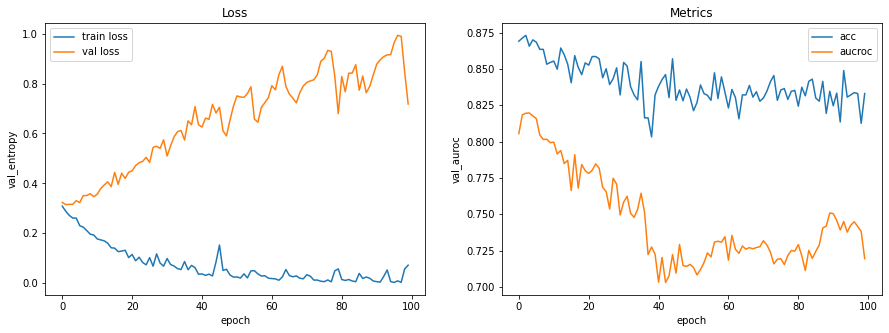

In [32]:
# 10%
plot_loss("training_logs/10_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

epoch            3.000000
train_entropy    0.272708
val_entropy      0.304968
val_acc          0.879888
val_auroc        0.826152
Name: 3, dtype: float64
Select model at epoch 4


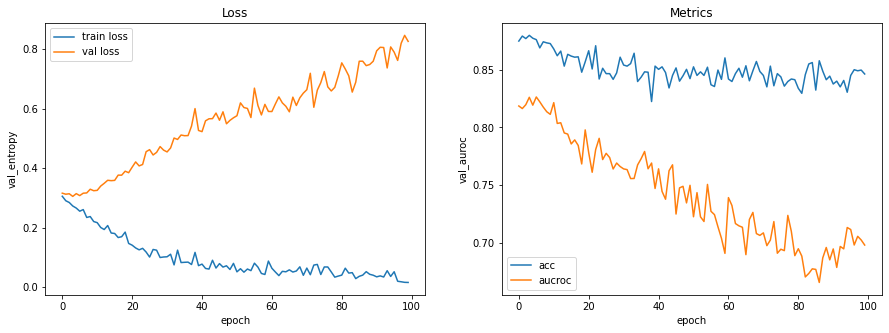

In [33]:
# 20%
plot_loss("training_logs/20_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

epoch            5.000000
train_entropy    0.254222
val_entropy      0.299835
val_acc          0.882992
val_auroc        0.840104
Name: 5, dtype: float64
Select model at epoch 6


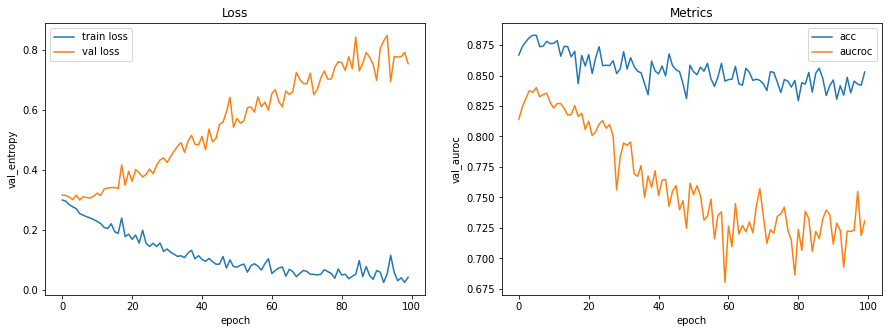

In [34]:
# 30%
plot_loss("training_logs/30_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

epoch            7.000000
train_entropy    0.251331
val_entropy      0.303169
val_acc          0.877095
val_auroc        0.832328
Name: 7, dtype: float64
Select model at epoch 8


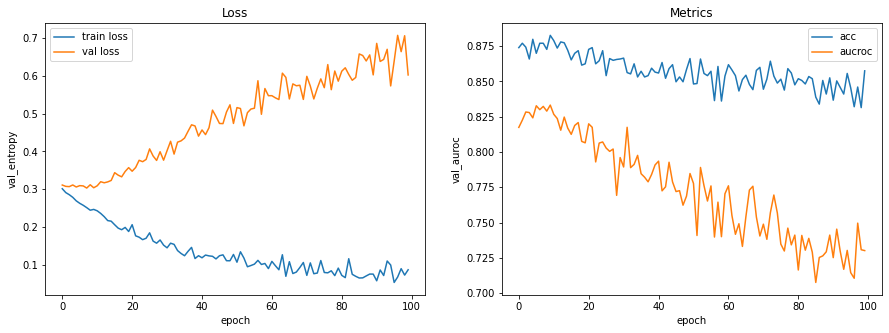

In [35]:
# 40%
plot_loss("training_logs/40_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

epoch            4.000000
train_entropy    0.268595
val_entropy      0.301065
val_acc          0.878647
val_auroc        0.835969
Name: 4, dtype: float64
Select model at epoch 5


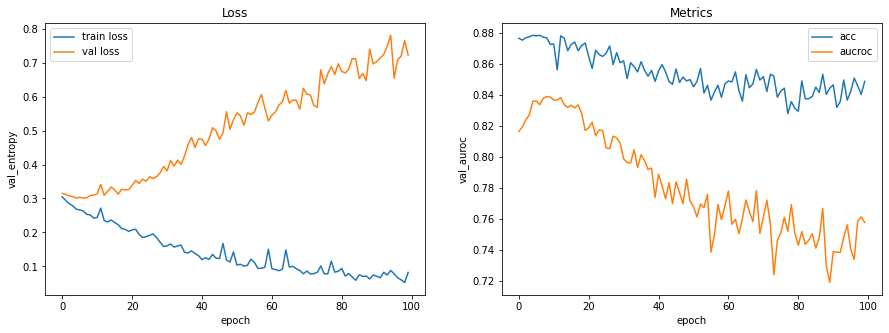

In [47]:
# 50%
plot_loss("training_logs/50_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

In [46]:
# 60%
plot_loss("training_logs/60_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

FileNotFoundError: [Errno 2] File training_logs/60_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv does not exist: 'training_logs/60_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv'

In [ ]:
# 70%
plot_loss("training_logs/70_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

In [ ]:
# 80%
plot_loss("training_logs/80_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

In [ ]:
# 90%
plot_loss("training_logs/90_k_lstm_stochastic.n16.d1.0.rd1.0.dep2.bs8.ts1.0.csv")

## Partially trained 0.3 dropout models

epoch            26.000000
train_entropy     0.284753
val_entropy       0.320117
val_acc           0.871198
val_auroc         0.806827
Name: 26, dtype: float64
Select model at epoch 27


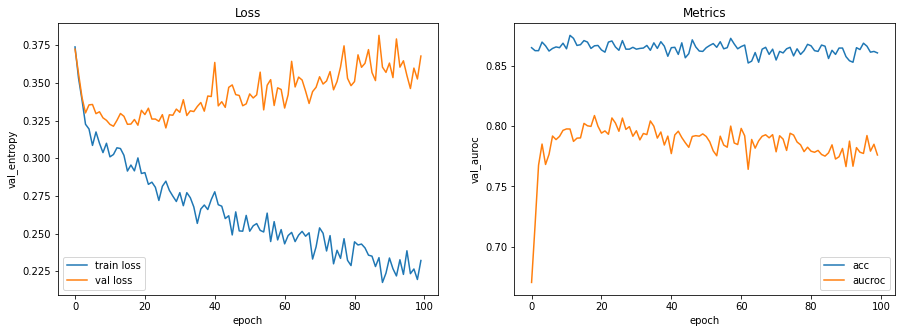

In [37]:
# 10%
plot_loss("training_logs/10_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2795   67] \
 [ 283   91]] \
entropy = 0.28717195540229123 \
accuracy = 0.8918417692184448 \
precision class 0 = 0.9080571532249451 \
precision class 1 = 0.5759493708610535 \
recall class 0 = 0.9765897989273071 \
recall class 1 = 0.24331550300121307 \
AUC of ROC = 0.8161489104885331 \
AUC of PRC = 0.43365722364362824 \
min(+P, Se) = 0.44533333333333336 \
Epistemic uncertainty = 0.004895341116935015 \
Aleatoric uncertainty = 0.09681370109319687 \
Uncertainty = 0.1017090454697609

epoch            36.000000
train_entropy     0.286595
val_entropy       0.307406
val_acc           0.875543
val_auroc         0.824884
Name: 36, dtype: float64
Select model at epoch 37


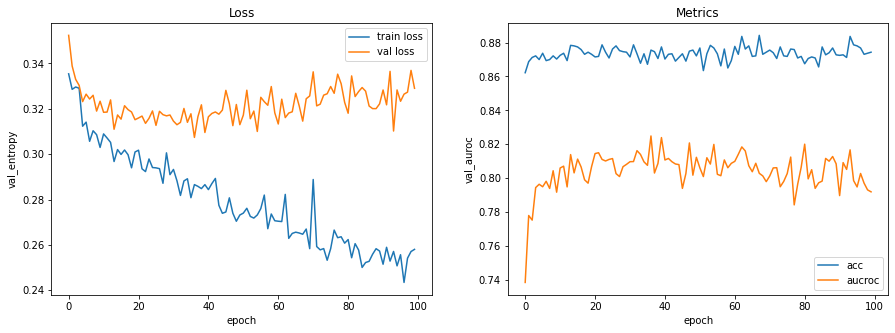

In [38]:
# 20%
plot_loss("training_logs/20_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2807   55] \
 [ 285   89]] \
entropy = 0.2795127298152224 \
accuracy = 0.8949320316314697 \
precision class 0 = 0.9078266620635986 \
precision class 1 = 0.6180555820465088 \
recall class 0 = 0.980782687664032 \
recall class 1 = 0.23796790838241577 \
AUC of ROC = 0.826186392224128 \
AUC of PRC = 0.4417581344827335 \
min(+P, Se) = 0.4625668449197861 \
Epistemic uncertainty = 0.004794477950781584 \
Aleatoric uncertainty = 0.08382467180490494 \
Uncertainty = 0.08861915022134781

epoch            75.000000
train_entropy     0.268244
val_entropy       0.305045
val_acc           0.881440
val_auroc         0.824497
Name: 75, dtype: float64
Select model at epoch 76


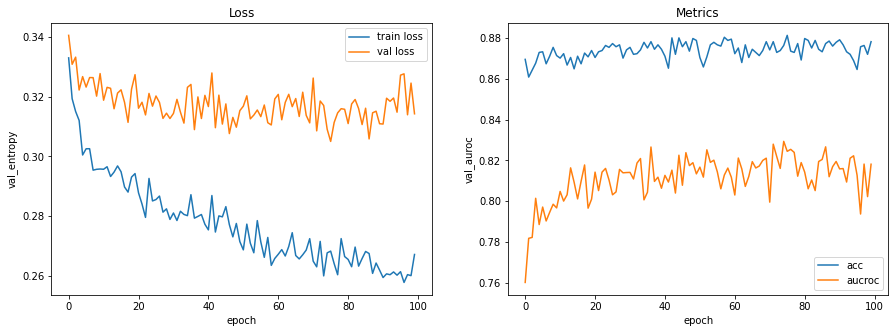

In [39]:
# 30%
plot_loss("training_logs/30_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2824   38] \
 [ 311   63]] \
entropy = 0.27326805993387354 \
accuracy = 0.8921508193016052 \
precision class 0 = 0.900797426700592 \
precision class 1 = 0.6237623691558838 \
recall class 0 = 0.9867225885391235 \
recall class 1 = 0.16844919323921204 \
AUC of ROC = 0.8366704409989648 \
AUC of PRC = 0.4576781813441626 \
min(+P, Se) = 0.46174142480211083 \
Epistemic uncertainty = 0.005054418463259935 \
Aleatoric uncertainty = 0.07458246499300003 \
Uncertainty = 0.07963688671588898

epoch            71.000000
train_entropy     0.284070
val_entropy       0.304423
val_acc           0.878957
val_auroc         0.826987
Name: 71, dtype: float64
Select model at epoch 72


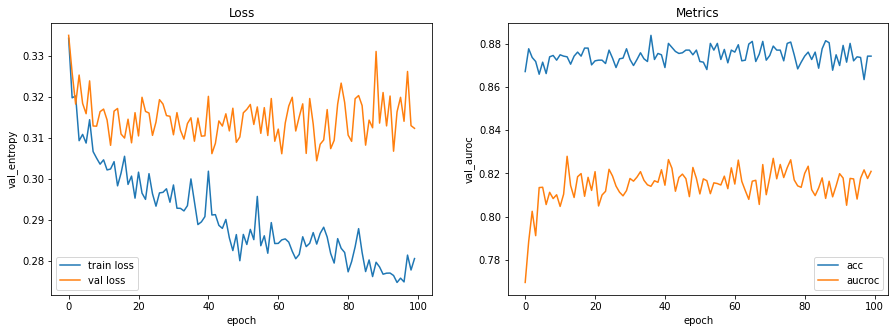

In [40]:
# 40%
plot_loss("training_logs/40_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2796   66] \
 [ 272  102]] \
entropy = 0.2686815440065627 \
accuracy = 0.8955500721931458 \
precision class 0 = 0.9113429188728333 \
precision class 1 = 0.6071428656578064 \
recall class 0 = 0.9769392013549805 \
recall class 1 = 0.27272728085517883 \
AUC of ROC = 0.8433502617742351 \
AUC of PRC = 0.48257905456985556 \
min(+P, Se) = 0.4572192513368984 \
Epistemic uncertainty = 0.004514836706221104 \
Aleatoric uncertainty = 0.08012654632329941 \
Uncertainty = 0.08464138209819794

epoch            37.000000
train_entropy     0.283763
val_entropy       0.301336
val_acc           0.881750
val_auroc         0.829021
Name: 37, dtype: float64
Select model at epoch 38


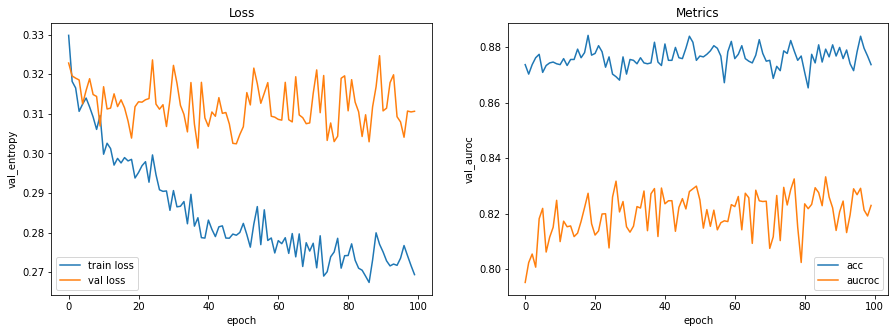

In [41]:
# 50%
plot_loss("training_logs/50_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2818   44] \
 [ 286   88]] \
entropy = 0.2657454639393491 \
accuracy = 0.8980222344398499 \
precision class 0 = 0.9078608155250549 \
precision class 1 = 0.6666666865348816 \
recall class 0 = 0.9846261143684387 \
recall class 1 = 0.23529411852359772 \
AUC of ROC = 0.8499936471634586 \
AUC of PRC = 0.4809269907101225 \
min(+P, Se) = 0.47619047619047616 \
Epistemic uncertainty = 0.004454883746802807 \
Aleatoric uncertainty = 0.08046099543571472 \
Uncertainty = 0.0849158763885498

epoch            98.000000
train_entropy     0.284682
val_entropy       0.297733
val_acc           0.878336
val_auroc         0.841341
Name: 98, dtype: float64
Select model at epoch 99


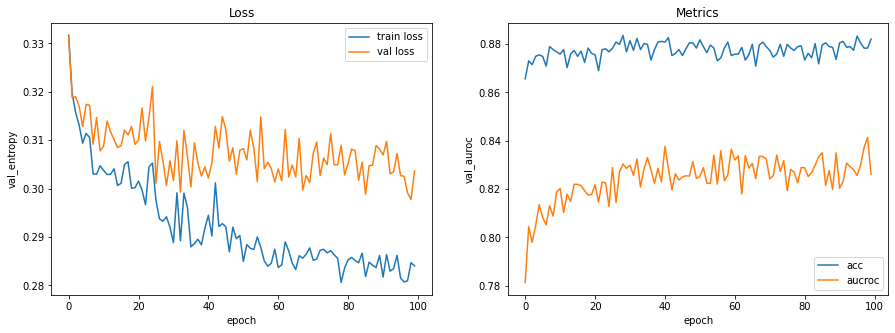

In [42]:
# 60%
plot_loss("training_logs/60_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2806   56] \
 [ 269  105]] \
entropy = 0.26204589944924556 \
accuracy = 0.8995673656463623 \
precision class 0 = 0.9125203490257263 \
precision class 1 = 0.6521739363670349 \
recall class 0 = 0.9804332852363586 \
recall class 1 = 0.2807486653327942 \
AUC of ROC = 0.8551889595174834 \
AUC of PRC = 0.4968004946122992 \
min(+P, Se) = 0.4973404255319149 \
Epistemic uncertainty = 0.005312192253768444 \
Aleatoric uncertainty = 0.07911758869886398 \
Uncertainty = 0.0844297781586647

epoch            56.000000
train_entropy     0.285744
val_entropy       0.295849
val_acc           0.884544
val_auroc         0.840994
Name: 56, dtype: float64
Select model at epoch 57


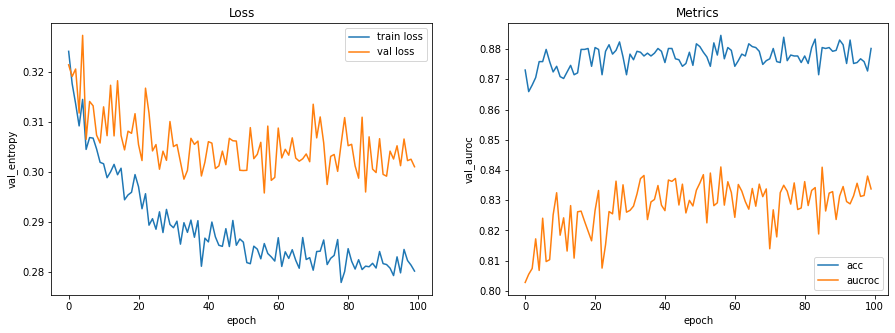

In [43]:
# 70%
plot_loss("training_logs/70_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2837   25] \
 [ 300   74]] \
entropy = 0.2657978631698783 \
accuracy = 0.8995673656463623 \
precision class 0 = 0.904367208480835 \
precision class 1 = 0.747474730014801 \
recall class 0 = 0.991264820098877 \
recall class 1 = 0.1978609561920166 \
AUC of ROC = 0.8504336745180252 \
AUC of PRC = 0.48495447100914135 \
min(+P, Se) = 0.47058823529411764 \
Epistemic uncertainty = 0.003571787616237998 \
Aleatoric uncertainty = 0.08113089948892593 \
Uncertainty = 0.08470268547534943

epoch            32.000000
train_entropy     0.287421
val_entropy       0.295025
val_acc           0.881130
val_auroc         0.840962
Name: 32, dtype: float64
Select model at epoch 33


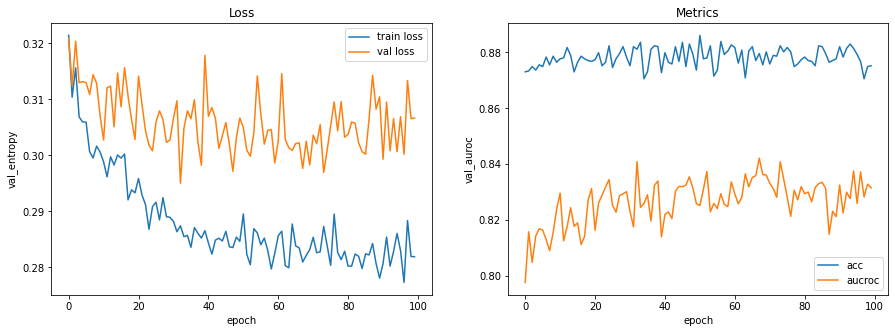

In [44]:
# 80%
plot_loss("training_logs/80_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2805   57] \
 [ 271  103]] \
entropy = 0.2645352790231456 \
accuracy = 0.8986402750015259 \
precision class 0 = 0.9118985533714294 \
precision class 1 = 0.643750011920929 \
recall class 0 = 0.9800838828086853 \
recall class 1 = 0.2754010558128357 \
AUC of ROC = 0.8487950163865814 \
AUC of PRC = 0.4976801926600321 \
min(+P, Se) = 0.48128342245989303 \
Epistemic uncertainty = 0.0040560136549174786 \
Aleatoric uncertainty = 0.07986011356115341 \
Uncertainty = 0.08391612768173218

epoch            81.000000
train_entropy     0.287746
val_entropy       0.293507
val_acc           0.881440
val_auroc         0.842501
Name: 81, dtype: float64
Select model at epoch 82


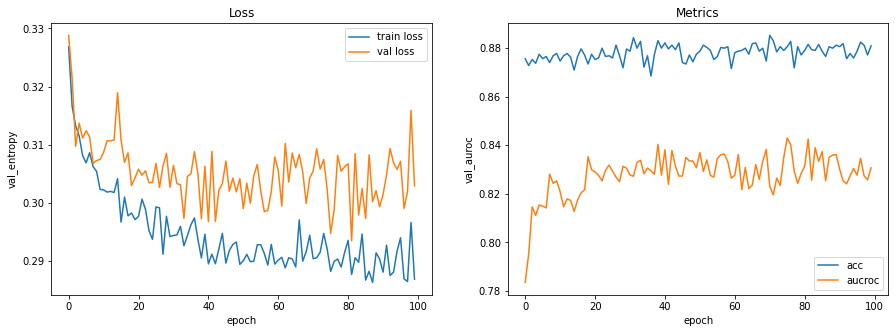

In [45]:
# 90%
plot_loss("training_logs/90_k_lstm_stochastic.n16.d0.3.rd0.3.dep2.bs8.ts1.0.csv")

confusion matrix: \
[[2810   52] \
 [ 276   98]] \
entropy = 0.2650155505779624 \
accuracy = 0.8986402750015259 \
precision class 0 = 0.9105638265609741 \
precision class 1 = 0.653333306312561 \
recall class 0 = 0.981830894947052 \
recall class 1 = 0.26203209161758423 \
AUC of ROC = 0.85030007810252 \
AUC of PRC = 0.49323300402105547 \
min(+P, Se) = 0.47593582887700536 \
Epistemic uncertainty = 0.0035286336205899715 \
Aleatoric uncertainty = 0.08572190999984741 \
Uncertainty = 0.08925054222345352